# Used libraries

In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Common functions

In [2]:
# frequency simulation for one particualr allele
def SimulateTrajectory(f:"admixture rate",
                       s:"force of natural selection",
                       n:"population size",
                       g:"total numper of simulated generations",
                       Tn:"time gap of neutrality",
                       output_tr=False):
    na = n * f
    nA = n * ( 1 - f )

    result = [f]
    fix_freq = None

    for gen in range(0,g+1) :

    ### total fitness for each genotype
        if gen < Tn:
            na_fitness = na
            nA_fitness = nA
        else:
            na_fitness = na * ( 1 + s )
            nA_fitness = nA

        draw_p = float( na_fitness ) / float( na_fitness + nA_fitness )
        if draw_p == 0.0 or draw_p == 1.0:
            fix_freq = draw_p
            break

        new_na = np.random.binomial(n,draw_p)

        result.append(float(new_na)/float(n))

        na = new_na
        nA = n - na
    while len(result) < g+1:
        result.append(fix_freq)
    if output_tr:
        print( "TR\t" + "\t".join(result) )
    return result

# Research of of force of natural selectin

## Simulation (function) --- long to calculate

**Note: fixed allele from the following function has frequency 1!!!**

In [3]:
# plot percent of fixed alleles for different set of Tn and s
def GetFixedPercentF(N:"amount of simuations for particular set of (f, s, n, g, Tn)",
                     Tn_range:"range of different periods of neutrality",
                     s_range:"range of different forces of selection",
                     f:"admixture rate",
                     n:"population size",
                     g:"total numper of simulated generations"):
    
    grid = np.zeros((len(Tn_range), len(s_range)))
    
    for i, Tn in enumerate(Tn_range):
        for j, s in enumerate(s_range):
            tmp = []
            for k in range(N):
                tmp.append(SimulateTrajectory(f, s, n, g, Tn)[-1])
            tmp = np.array(tmp)
            grid[i, j] = len(tmp[tmp == 1.]) / N # here frequency equals 1, which is true !!!
        print(f"Done {round((i+1)/len(Tn_range)*100)} %")
    
    px = 1 / plt.rcParams['figure.dpi']
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize=(1000 * px, 1000 * px))
    sns.heatmap(grid, vmin = 0, vmax = 1, xticklabels = s_range, yticklabels = Tn_range, annot=True, fmt=".2f", ax=ax)

Done 9 %
Done 18 %
Done 27 %
Done 36 %
Done 45 %
Done 55 %
Done 64 %
Done 73 %
Done 82 %
Done 91 %
Done 100 %


<Figure size 432x288 with 0 Axes>

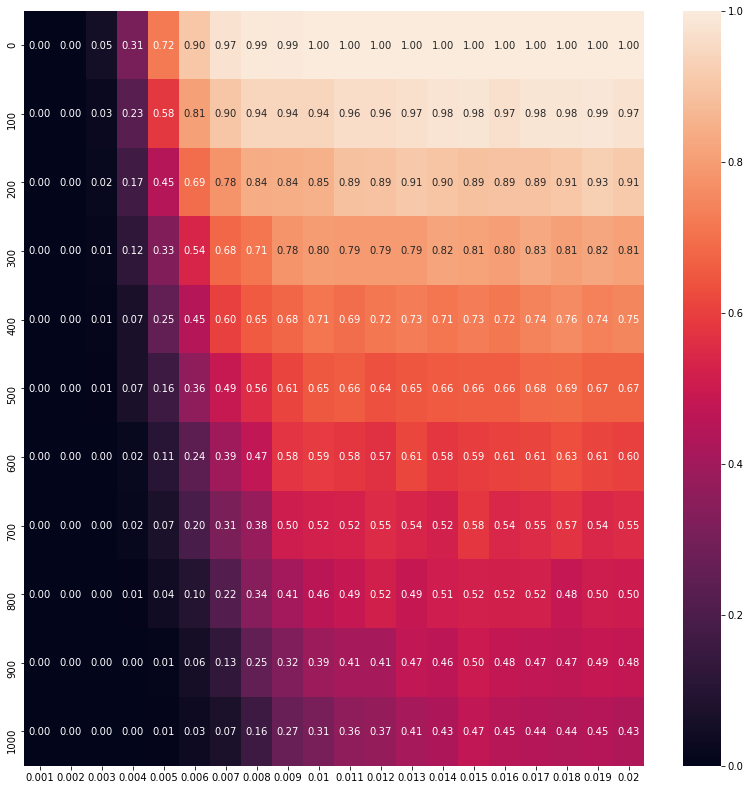

In [6]:
GetFixedPercentF(1000, [(i)*100 for i in range(11)], [(i+1)/1000 for i in range(20)], 0.03, 10000, 2000)

## Simulation (SELAM)

**Note: fixed allele in SELAM dataset has frequency 0!!!**

In [47]:
test_data = FormData(r"C:\HSE\EPISTASIS\nn\next_gen_simulation_densetest")[:, :, 0]

Working file 0 / 10000
Working file 100 / 10000
Working file 200 / 10000
Working file 300 / 10000
Working file 400 / 10000
Working file 500 / 10000
Working file 600 / 10000
Working file 700 / 10000
Working file 800 / 10000
Working file 900 / 10000
Working file 1000 / 10000
Working file 1100 / 10000
Working file 1200 / 10000
Working file 1300 / 10000
Working file 1400 / 10000
Working file 1500 / 10000
Working file 1600 / 10000
Working file 1700 / 10000
Working file 1800 / 10000
Working file 1900 / 10000
Working file 2000 / 10000
Working file 2100 / 10000
Working file 2200 / 10000
Working file 2300 / 10000
Working file 2400 / 10000
Working file 2500 / 10000
Working file 2600 / 10000
Working file 2700 / 10000
Working file 2800 / 10000
Working file 2900 / 10000
Working file 3000 / 10000
Working file 3100 / 10000
Working file 3200 / 10000
Working file 3300 / 10000
Working file 3400 / 10000
Working file 3500 / 10000
Working file 3600 / 10000
Working file 3700 / 10000
Working file 3800 / 1000

In [45]:
def FormData(path):

    temp_data = []
    inputs = []

    file_list = sorted(os.listdir(path))
    train_number = len(file_list)

    for i in range(train_number):
        if (i % 100) == 0:
            print(f"Working file {i} / {train_number}")
        exact_file = path + '/' + file_list[i]
        file = open(exact_file, 'r')
        for line_num, line in enumerate(file):
            array = line.split('\t')
            temp = [array[2], array[3], array[4], array[5], array[6], array[7], array[8], array[9], array[10]]
            temp = [float(i) if i != '-nan' and i != '-nan\n' else float(0) for i in temp]
            if temp[0] != 0:
                temp[0] = temp[0] * 10
            if temp[1] != 0:
                temp[1] = temp[1] * 1000
            if temp[2] != 0:
                temp[2] = temp[2] * 1000
            if temp[3] != 0:
                temp[3] = temp[3] * 1000000
            if temp[4] != 0:
                temp[4] = temp[4] * 1000000
            if temp[5] != 0:
                temp[5] = temp[5] * 1000
            if temp[6] != 0:
                temp[6] = temp[6] * 1000
            if temp[7] != 0:
                temp[7] = temp[7] * 1000
            if temp[8] != 0:
                temp[8] = temp[8] * 1000
            temp_data += [temp]
            if line_num == 1001:
                break
        temp = np.array(temp_data)
#         start = temp[:500, :]
#         end = temp[1001:500:-1, :]
#         temp_data = np.concatenate((np.add(start, end) / 2, temp[500, :].reshape((1, 1, 9))), axis=0)
        inputs += [temp_data]
        temp_data = []
        file.close()

    return np.array(inputs)

### For all dataset

In [125]:
def GetFixedPercentS(data:"numpy array with frequencies",
                     Tn_range:"range of different periods of neutrality",
                     s_range:"range of different forces of selection"):
    
    files = np.array(list(map(lambda name: np.array(name.split('_'))[[0, 2]].astype(dtype=float), sorted(os.listdir(r"C:\HSE\EPISTASIS\nn\next_gen_simulation_densetest")))))
    grid = np.zeros((len(Tn_range), len(s_range)))
    N = data.shape[1]

    for i, Tn in enumerate(Tn_range):
        for j, s in enumerate(s_range):
            selected = data[(files[:, 0] == Tn) * (files[:, 1] == s)]
            for k in range(len(selected)):
                grid[i, j] += len(selected[k][selected[k] == 0.]) / N / len(selected) # here frequency equals 0, which is true !!!

        print(f"Done {round((i+1)/len(Tn_range)*100)} %")
    
    px = 1 / plt.rcParams['figure.dpi']
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize=(1400 * px, 600 * px))
    sns.heatmap(grid, xticklabels = s_range, yticklabels = Tn_range, annot=True, fmt=".2f", square=True, ax=ax)

Done 10 %
Done 20 %
Done 30 %
Done 40 %
Done 50 %
Done 60 %
Done 70 %
Done 80 %
Done 90 %
Done 100 %


<Figure size 432x288 with 0 Axes>

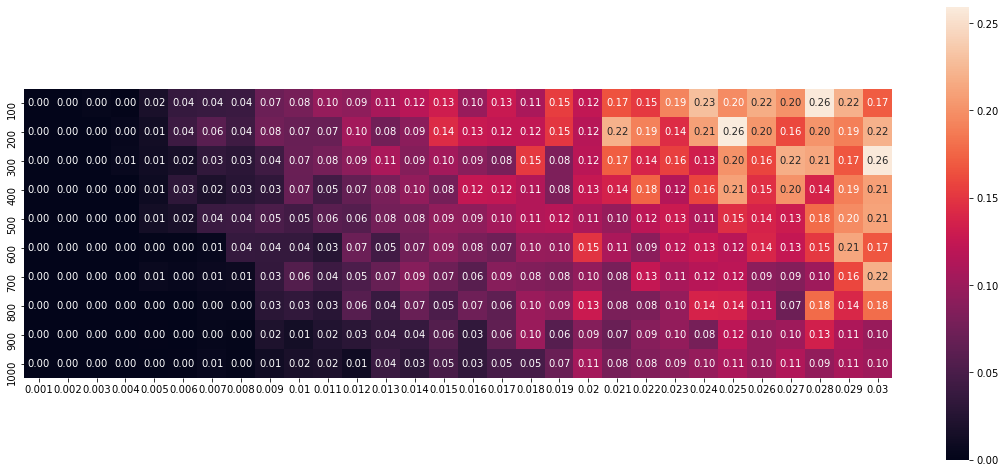

In [126]:
GetFixedPercentS(test_data, [(i+1)*100 for i in range(10)], [(i+1)/1000 for i in range(30)])

### For locuses under selection

In [167]:
def GetFixedPercentSM(data:"numpy array with frequencies",
                      Tn_range:"range of different periods of neutrality",
                      s_range:"range of different forces of selection"):
    
    files = np.array(list(map(lambda name: np.array(name.split('_'))[[0, 2]].astype(dtype=float), sorted(os.listdir(r"C:\HSE\EPISTASIS\nn\next_gen_simulation_densetest")))))
    grid = np.zeros((len(Tn_range), len(s_range)))
    N = data.shape[1]

    for i, Tn in enumerate(Tn_range):
        for j, s in enumerate(s_range):
            selected = data[(files[:, 0] == Tn) * (files[:, 1] == s)]
            for k in range(len(selected)):
                grid[i, j] += 1 / len(selected) if selected[k][501] == 0. else 0. # here frequency equals 0, which is true !!!

        print(f"Done {round((i+1)/len(Tn_range)*100)} %")
    
    px = 1 / plt.rcParams['figure.dpi']
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize=(1400 * px, 600 * px))
    sns.heatmap(grid, xticklabels = s_range, yticklabels = Tn_range, annot=True, fmt=".2f", square=True, ax=ax)

Done 10 %
Done 20 %
Done 30 %
Done 40 %
Done 50 %
Done 60 %
Done 70 %
Done 80 %
Done 90 %
Done 100 %


<Figure size 432x288 with 0 Axes>

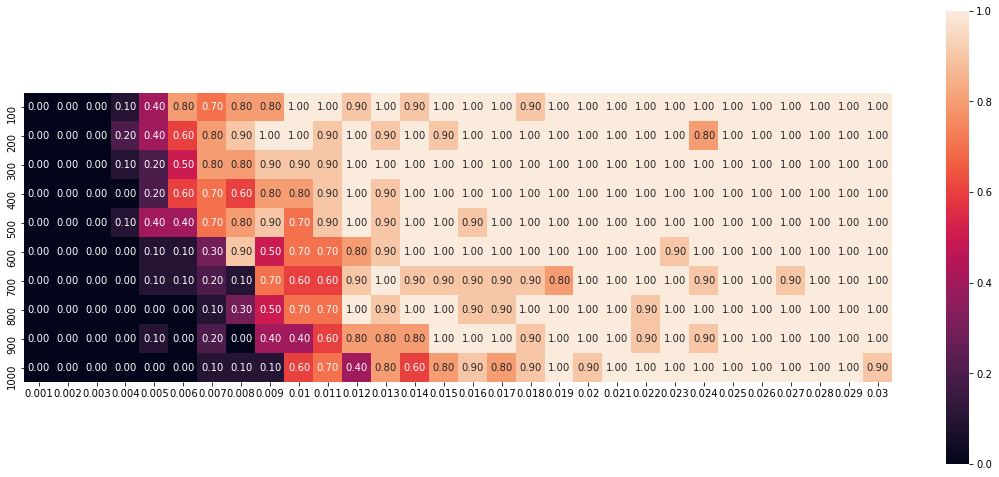

In [168]:
GetFixedPercentSM(test_data, [(i+1)*100 for i in range(10)], [(i+1)/1000 for i in range(30)])

**Finally: upper limit of force of natural selection is 0.003**

# Allele distribution

## Graphical

Есть вероятность, что это не верно

In [21]:
def AlleleDistribution(f:"admixture rate",
                       s:"force of natural selection",
                       n:"population size",
                       g:"total numper of simulated generations",
                       Tn:"time gap of neutrality",
                       N:"amount of simulations" = 1000):
    
    res = []
    for i in range(N):
        res.append(SimulateTrajectory(f, s, n, g, Tn)[-1])
        
    px = 1 / plt.rcParams['figure.dpi']
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize=(640 * px, 640 * px))
    ax.hist(res, bins=100, rwidth=0.8)

<Figure size 432x288 with 0 Axes>

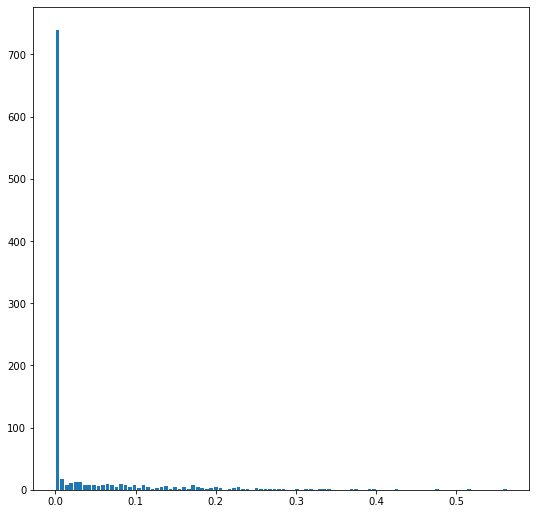

In [36]:
AlleleDistribution(0.03, 0.000, 10000, 2000, 100)

## KS test

In [38]:
def GenDist(f:"admixture rate",
            s:"force of natural selection",
            n:"population size",
            g:"total numper of simulated generations",
            Tn:"time gap of neutrality",
            N:"amount of simulations" = 1000):
    
    res = []
    for i in range(N):
        res.append(SimulateTrajectory(f, s, n, g, Tn)[-1])
    
    return res

In [59]:
d1 = GenDist(0.03, 0.000, 10000, 2000, 1000) # no natural selection (anyway, what Tn parameter should be then?)

s_range = [(i)/10000 for i in range(10, 0, -1)]
samples = 10

p = []

for _, s in enumerate(s_range):
    tmp = 0
    for j in range(samples):
        d2 = GenDist(0.03, s, 10000, 2000, 1000)
        tmp += ks_2samp(d1, d2)[1]
    p.append(tmp / samples)
    print(f"Done {round((_+1)/len(s_range)*100)} %")

Done 10 %
Done 20 %
Done 30 %
Done 40 %
Done 50 %
Done 60 %
Done 70 %
Done 80 %
Done 90 %
Done 100 %


<Figure size 432x288 with 0 Axes>

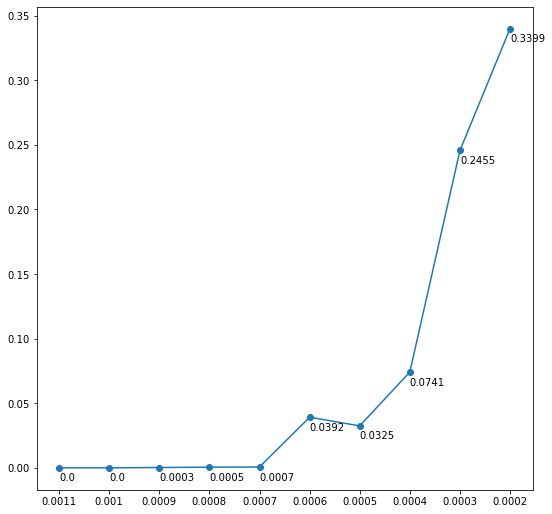

In [78]:
plt.clf()
px = 1 / plt.rcParams['figure.dpi']
fig, ax = plt.subplots(1, 1, figsize=(640 * px, 640 * px))
ax.set_xticks(list(range(0, 10)))
ax.set_xticklabels(s_range)
plt.plot(p, 'o-')

for i in range(len(s_range)):
    plt.annotate(round(p[i],4), xy=(i, p[i]-0.01))

plt.show()

# Results

**Finally: the appropriate interval is from 0.0007 to 0.003**

# Find interval

In [39]:
with open(r'C:\HSE\EPISTASIS\nn\all_inputs_testdd.npy', 'rb') as f:
    data = np.load(f)
print(np.max(data[:, :, 2]/1000))

0.0102998


In [28]:
np.max([[1, 2], [3, 4]])

4

In [50]:
file_list = sorted(os.listdir(r'C:\HSE\EPISTASIS\nn\next_gen_simulation_densetest'))

maxa = 0
maxb = 0

for i in range(10000):
    if float(file_list[i].split('_')[-2]) < 0.02:
        if (i % 100) == 0:
            print("Train file ", i, flush=True)
        exact_file = r'C:\HSE\EPISTASIS\nn\next_gen_simulation_densetest' + '/' + file_list[i]
        file = open(exact_file, 'r')
        for line_num, line in enumerate(file):
            array = line.split('\t')
            temp = [array[2], array[3], array[4], array[5], array[6], array[7], array[8]]
            temp = [float(i) if i != '-nan' and i != '-nan\n' else float(0) for i in temp]

            if temp[1] > maxa:
                maxa = temp[1]

            if temp[2] > maxb:
                maxb = temp[2]
                filename = file_list[i]

            if line_num == 1000:
                break

print('a0', maxa)
print('a1', maxb)

print(filename)

Train file  0
Train file  100
Train file  1000
Train file  1100
Train file  2000
Train file  2100
Train file  3000
Train file  3100
Train file  4000
Train file  4100
Train file  5000
Train file  5100
Train file  6000
Train file  6100
Train file  7000
Train file  7100
Train file  8000
Train file  8100
Train file  9000
Train file  9100
a0 0.00749881
a1 0.00924456
1000_0.03_0.015_0.txt


## Simulation data analysis

In [2]:
data = np.load(r'C:\HSE\EPISTASIS\nn\new_data_selected\all_inputs_testtrue.npy')

In [5]:
print(ks_2samp(data[1, :, 0], data[8000, :, 0])[1])

9.008004960845764e-82


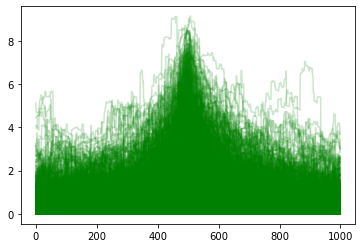

In [38]:
plt.clf()
plt.plot(data[1:1000, :, 0].T, color='green', alpha=0.2)
plt.show()

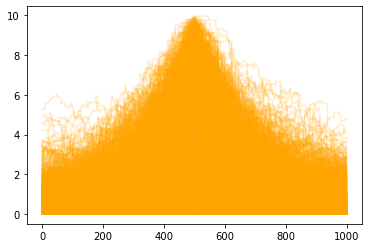

In [39]:
plt.clf()
plt.plot(data[8000:9000, :, 0].T, color='orange', alpha=0.2)
plt.show()

In [4]:
# Math
import math
import numpy as np

# Tools
def tabulate(x, y, f):
    """Return a table of f(x, y). Useful for the Gram-like operations."""
    return np.vectorize(f)(*np.meshgrid(x, y, sparse=True))

def cos_sum(a, b):
    """To work with tabulate."""
    return(math.cos(a+b))

def gramian_angular_field(serie):
    """
    Compute the Gramian Angular Field of a given time serie.
    Parameters: 
    - serie: (np.array of shape (n, 1)) input time-serie
    Output:
    - gaf: (np.array of shape (n, n)) Gramian Angular Field generated
    """
    # Min-Max scaling
    min_ = np.min(serie)
    max_ = np.max(serie)
    scaled_serie = (2*serie - max_ - min_)/(max_ - min_)
    
    # Floating point inaccuracy!
    scaled_serie = np.where(scaled_serie >= 1., 1., scaled_serie)
    scaled_serie = np.where(scaled_serie <= -1., -1., scaled_serie)

    # Polar encoding
    phi = np.arccos(scaled_serie)
    r = np.linspace(0, 1, len(scaled_serie))
    
    # GAF Computation (every term of the matrix)
    gaf = tabulate(phi, phi, cos_sum)
    return(gaf)

In [2]:
from pyts.image import GramianAngularField

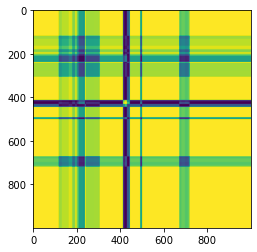

In [5]:
data = gramian_angular_field(np.load('all_inputs_testtrue.npy')[1069, :, 0])
plt.clf()
plt.imshow(data)
plt.show()

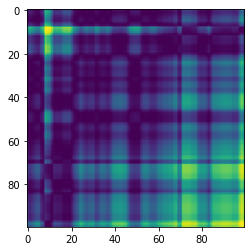

[[1.47  1.47  1.47  1.47  1.47  1.61  1.61  1.61  1.63  1.65  1.65  1.65
  1.655 1.655 1.655 1.7   1.7   1.7   1.7   1.66  1.66  1.5   1.5   1.5
  1.485 1.505 1.53  1.52  1.52  1.52  1.52  1.315 1.315 1.315 1.315 1.315
  1.31  1.31  1.31  1.31  1.31  1.31  1.23  1.23  1.23  1.23  1.19  1.19
  1.19  1.19  1.19  1.19  0.985 0.985 0.985 1.31  1.31  1.31  1.31  1.31
  1.42  1.42  1.555 1.555 1.555 1.555 1.77  1.77  1.77  1.77  1.77  1.77
  1.75  1.75  1.705 1.95  1.965 1.965 1.965 1.965 1.965 1.96  2.585 2.585
  2.485 2.75  2.75  2.75  2.77  2.77  2.53  2.53  2.53  2.525 2.525 2.525
  2.525 2.525 2.525 2.525 2.525 2.515 2.52  2.52  2.52  2.49  2.49  2.49
  2.49  2.495 2.55  2.55  2.55  2.635 2.635 2.645 1.76  1.855 1.855 1.855
  1.825 1.825 1.825 1.825 1.825 1.825 1.825 1.835 1.83  1.83  1.685 1.685
  1.685 1.865 1.865 2.035 2.035 2.035 1.97  1.905 1.905 1.905 1.905 1.905
  1.87  1.87  1.86  1.86  1.86  1.88  1.88  1.805 1.805 1.81  1.84  1.93
  1.93  1.93  1.93  1.91  1.91  2.105 2.105 2.

In [14]:
data = np.expand_dims(np.load('all_inputs_testtrue.npy')[1, :, 0], axis=1).reshape((1, -1))
gadf = GramianAngularField(image_size=100, method='summation')
X_gadf = gadf.fit_transform(data)
plt.clf()
plt.imshow(X_gadf.squeeze())
plt.show()
print(data)

In [52]:
data = np.expand_dims(np.load('all_inputs_testtrue.npy')[2028, :, 0], axis=1).reshape((1, -1))
print(data)

[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.15  0.15  0.145 0.145 0.135 0.135 0.135 0.135 0.135
  0.135 0.135 0.135 0.135 0.135 0.135 0.135 0.135 0.135 0.135 0.135 0.135
  0.135 0.135 0.135 0.135 0.135 0.135 0.135 0.135 0.135 0.135 0.135 0.135
  0.135 0.135 0.135 0.135 0.135 0.135 0.135 0.14  0.14  0.14  0.14  0.14
  0.14  0.14  0.14  0.14  0.025 0.025 0.025 0.025 0.025 0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  

In [58]:
data = np.expand_dims(np.load('all_inputs_testtrue.npy')[6028, :, 0], axis=1).reshape((1, -1))
print(data)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [10]:
counter = 0
data = np.load('all_inputs_traintrue.npy')
for i in range(len(data)):
    if np.all(data[i, 490:510, 0]==0):
        counter += 1
print(counter)
print(data[0, 490:510, 0][data[0, 490:510, 0] == 0])

12440
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


(100000, 1000, 9)
TENS 106
(87454, 100, 100)


<Figure size 432x288 with 0 Axes>

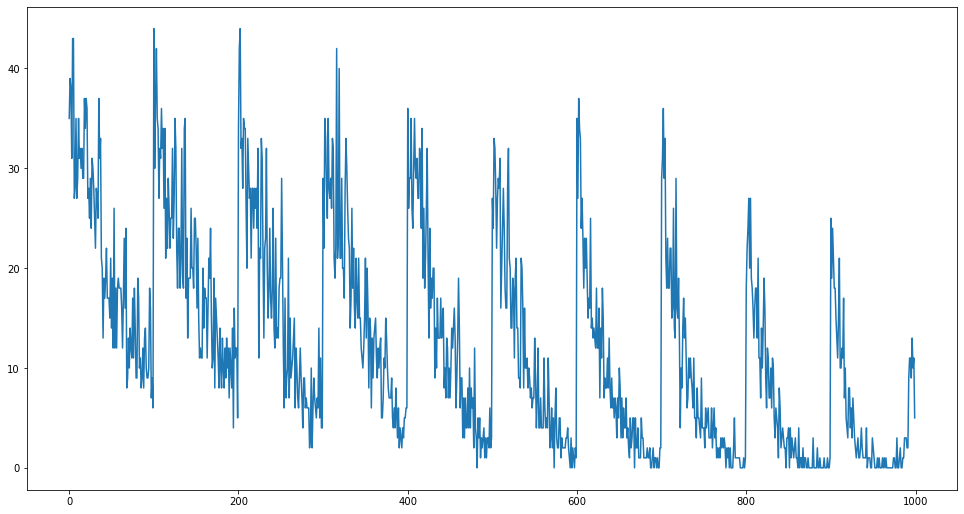

In [4]:
import os
fl = sorted(os.listdir('./next_gen_simulation_real'))
l = []
tens = []
data = np.load('all_inputs_traintrue.npy')
print(data.shape)
for i in range(len(data)):
    if np.all(data[i, 490:510, 0]==0) or len(data[i, 490:510, 0][data[i, 490:510, 0] == 10] >= 1):
        l.append(False)
    else:
        l.append(True)
    if len(data[i, 490:510, 0][data[i, 490:510, 0] == 10] >= 1):
        tens.append(True)
print('TENS', len(tens))
gadf = GramianAngularField(image_size=100, method='summation')
X_gadf = gadf.fit_transform(data[l, :, 0])
print(X_gadf.shape)
np.save('all_inputs_traintrueg.npy', X_gadf)

px = 1 / plt.rcParams['figure.dpi']

plt.clf()
sc = []
l = np.array(l)
for i in range(0, len(l), 100):
    sc.append(len(l[i:i+100][l[i:i+100] == False]))
fig, ax = plt.subplots(1, 1, figsize=(1200 * px, 640 * px))
ax.plot(range(len(sc)), sc)
plt.show()

data = np.load('all_targets_traintrue.npy')
np.save('all_targets_traintrueg.npy', data[l, :])

In [25]:
np.all(np.array([0., 1.]) == 0)

False

In [31]:
import os
print(sorted(os.listdir('./next_gen_simulation_realtest'))[6028])

601_0.03_0.0008_1I.txt


In [43]:
np.all(np.load('all_inputs_traintrue.npy')[48200, 490:510, 0] == 0)

False

In [20]:
import os
l = []
data = np.load('all_inputs_traintrue.npy')
print(data.shape)
for i in range(len(data)):
    if np.all(data[i, 490:510, 0]==0) or len(data[i, 490:510, 0][data[i, 490:510, 0] == 10] >= 1):
        l.append(False)
    else:
        l.append(True)

np.save('all_inputs_traintrueg.npy', data[l, :, :])

true_filelist = np.array(sorted(os.listdir('./next_gen_simulation_real')))[l]

data = np.load('all_targets_traintrue.npy')
np.save('all_targets_traintrueg.npy', data[l, :])

(100000, 1000, 9)


In [15]:
np.load('all_targets_traintrueg.npy')[80000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [9]:
import numpy as np
import os

def FormTarget(gen):

    gen_int = [i * 100 + 1 for i in range(10)]
    gen_array = np.full(10, 0)
    for k, elem in enumerate(gen_int):
        if gen == elem:
            gen_array[k] = 1

    return gen_array

def FormData(path):

    temp_data = []
    inputs = []
    targets = []
    big_inputs = []

    file_list = sorted(os.listdir(path))

    for i in range(len(file_list)):

        one_target = FormTarget(float(file_list[i].split('_')[0]))
        targets += [one_target]

    return np.array(targets).astype(int)

all_targets = FormData('/home/avshmelev/bash_scripts/selam/next_gen_simulation_realtest/')
print(all_targets.shape)
with open('all_targets_testtrue.npy', 'wb') as f:
    np.save(f, all_targets)

(10000, 10)


In [24]:
data = np.load('all_inputs_traintrueg.npy')
print(data.shape)

(87454, 1000, 9)


1.1968461534608873e-29
['201_0.03_0.0016_17G.txt' '201_0.03_0.0016_17J.txt']


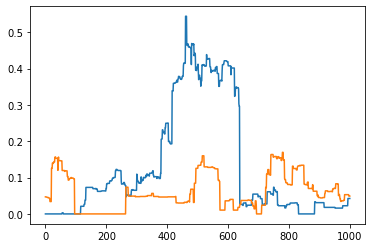

In [33]:
n1, n2 = 8600*2, 8601*2

print(ks_2samp(data[n1, :, 0], data[n2, :, 0])[1])
print(true_filelist[[n1, n2]])
plt.clf()
plt.plot(data[[n1, n2], :, 0].T/10)
plt.show()